# Eliminación de vignetting

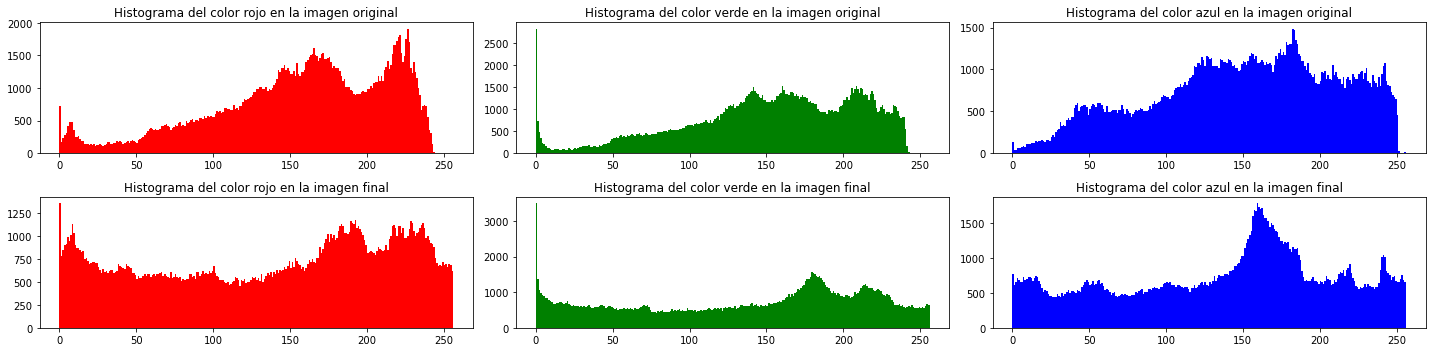

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/aquar/Desktop/vignetting3.jpg')
height, width, rgb = img.shape
original = img.copy()

#Generamos una máscara de vignetting a partir de una distribución Gaussiana.
kernel_w = cv2.getGaussianKernel(width, 200)
kernel_h = cv2.getGaussianKernel(height, 200)
kernel = kernel_h * kernel_w.T

#Normalizamos la máscara para que tome valores en el intervalo [0,1]
mask = kernel / np.max(kernel)

redi = original[:,:,0]
greeni = original[:,:,1]
bluei = original[:,:,2]

#La máscara se aplica a cada canal de color de la imagen de entrada.
#La máscara tiene valores cercanos a cero en los márgenes de la imagen y
#valores cercanos a uno en la zona central. Por consiguiente, al aplicar la
#máscara a la imagen de entrada en forma de división, los márgenes tomarán
#valores más alejados de 0 (del negro) y se eliminará el vignetting. En cambio,
#los píxeles en la zona central de la imagen no se verán muy afectados puesto
#que se dividen por valores próximos a la unidad.
for i in range(height):
    for j in range(width):
        img[i, j, :] = img[i,j,:] / mask[i,j]
img = img / mask
        
# for i in range(height):
#     for j in range(width):
#         for k in range(rgb):
#             if (img[i,j,k]>255):
#                 img[i,j,k]=255
img = img.where((img > 255), 255, a)

redf = img[:,:,0]
greenf = img[:,:,1]
bluef = img[:,:,2]

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,5))
ax1.set_title('Histograma del color rojo en la imagen original')
ax1.hist(redi.ravel(), 256, [0,256], color='r')
ax2.set_title('Histograma del color verde en la imagen original')
ax2.hist(greeni.ravel(), 256, [0,256], color='g')
ax3.set_title('Histograma del color azul en la imagen original')
ax3.hist(bluei.ravel(), 256, [0,256], color='b')
ax4.set_title('Histograma del color rojo en la imagen final')
ax4.hist(redf.ravel(), 256, [0,256], color='r')
ax5.set_title('Histograma del color verde en la imagen final')
ax5.hist(greenf.ravel(), 256, [0,256], color='g')
ax6.set_title('Histograma del color azul en la imagen final')
ax6.hist(bluef.ravel(), 256, [0,256], color='b')
plt.tight_layout()
plt.show()
                
cv2.imshow('Mascara aplicada', mask)
cv2.imshow('Original', original)
cv2.imshow('Sin vignetting', img)
cv2.waitKey(0)
cv2.destroyAllWindows()